In [1]:
import numpy as np
import matplotlib.pyplot as plt
from planes import RandomProjectionForestOld
from projections import RandomProjectionForest
from iforest import IsolationForest

In [2]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [7]:
def run(model, name):    
    # fit the model
    try:
        clf = model(n_estimators=1000, max_depth=1000)
        clf = clf.fit(X_train)
        xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
        Z = 1 - clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        
    except:
        clf = model(n_estimators=1000)
        clf = clf.fit(X_train)
        xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
        Z = 1 - clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    
    # y_pred_train = clf.predict(X_train)
    # y_pred_test = clf.predict(X_test)
    # y_pred_outliers = clf.predict(X_outliers)
    
    # plot the line, the samples, and the nearest vectors to the plane
    Z = Z.reshape(xx.shape)
    plt.title(name)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

    b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
    b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
    c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
    plt.axis('tight')
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.legend([b1, b2, c],
               ["training observations",
                "new regular observations", "new abnormal observations"],
               loc="upper left")
    plt.show()

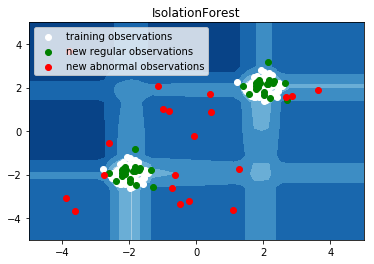

In [8]:
run(IsolationForest, "IsolationForest")

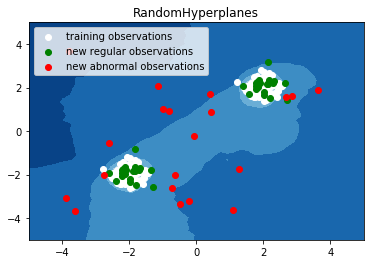

In [9]:
run(RandomProjectionForestOld, "RandomHyperplanes")

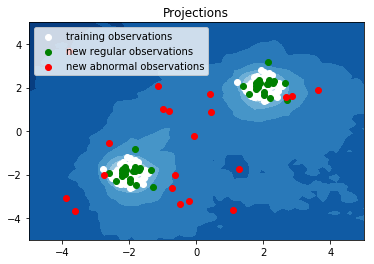

In [10]:
run(RandomProjectionForest, "Projections")